#### **Applied Machine Learning Midterm Project**
**Mahitha Kunta**

- CSIS 44670-81
- Date: 4/15/2025

**This project demonstrates applying classification modeling techniques to a real-world dataset**. 
- Load and explore a dataset.
- Analyze feature distributions and consider feature selection.
- Train and evaluate a classification model.
- Compare different classification approaches.
- Document your work in a structured Jupyter Notebook.
- Conduct a peer review of a classmate’s project.

#### **Introduction** 

This notebook explores mushroom classification using machine learning techniques to differentiate between edible and poisonous mushrooms. Using the UCI Machine Learning Repository's Mushroom Dataset, we analyze various physical characteristics like odor, gill color, and spore print color to build predictive models. Primary goal is to develop a reliable classifier that can identify poisonous mushrooms with high accuracy, as misclassification could have serious consequences. The analysis employs both Random Forest and Decision Tree algorithms, with particular attention to feature selection and model validation.


#### **Section 1. Import and Inspect the Data**

In [9]:
# Standard libraries
import os
import pandas as pd


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import pandas for data manipulation and analysis.
import numpy as np

# Import the California housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split

# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import performance metrics for model evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Import Pandas Plotting and Scatter Matrix
from pandas.plotting import scatter_matrix

# Import Stratified Shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Machine Learning - Preprocessing
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder
)

# Machine Learning - Model Selection
from sklearn.model_selection import (
    train_test_split,
    cross_val_score
)

# Machine Learning - Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import (
    DecisionTreeClassifier,
    plot_tree
)

# Machine Learning - Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)


In [13]:
# Define column names
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 
           'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 
           'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring', 
           'stalk-color-below-ring', 'veil-type', 'veil-color', 
           'ring-number', 'ring-type', 'spore-print-color', 
           'population', 'habitat']

# Read the data file
df = pd.read_csv(r'C:\Users\Mahi2\projects\midterm\agaricus-lepiota.data', names=columns)


# Split into features and target
X = df.drop('class', axis=1)
y = df['class']

# Display first 10 rows
print("First 5 rows of features:")
print(X.head())

print("\nFirst 5 rows of target:")
print(y.head())

First 5 rows of features:
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                 

In [14]:
# Create data directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Save features and target to separate CSV files
X.to_csv('data/mushroom_features.csv', index=False)
y.to_csv('data/mushroom_target.csv', index=False)

# Verify the save by loading and displaying
df_features = pd.read_csv('data/mushroom_features.csv')
df_target = pd.read_csv('data/mushroom_target.csv')

print("Features saved with shape:", df_features.shape)
print("Target saved with shape:", df_target.shape)
print("\nFeature columns:", df_features.columns.tolist())

Features saved with shape: (8124, 22)
Target saved with shape: (8124, 1)

Feature columns: ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


**1.2 Check for missing values and display summary statistics.**

In [15]:
# Check for question marks and display counts
print("Features containing '?' values:")
print("-" * 30)
question_mark_counts = (X == '?').sum()
question_mark_percent = ((X == '?').sum() / len(X) * 100).round(2)

# Create summary DataFrame
missing_summary = pd.DataFrame({
    '? Count': question_mark_counts,
    '? Percent': question_mark_percent
})

# Only show features with ? values
print(missing_summary[missing_summary['? Count'] > 0])

# Show distribution of values including ? for affected features
print("\nValue distributions for features with '?' values:")
print("-" * 50)
for column in missing_summary[missing_summary['? Count'] > 0].index:
    print(f"\n{column}:")
    print(X[column].value_counts())

Features containing '?' values:
------------------------------
            ? Count  ? Percent
stalk-root     2480      30.53

Value distributions for features with '?' values:
--------------------------------------------------

stalk-root:
stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64


In [16]:
# Display summary statistics
print("\nSummary statistics for features:")
print(X.describe())


Summary statistics for features:
       cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count       8124        8124      8124    8124  8124            8124   
unique         6           4        10       2     9               2   
top            x           y         n       f     n               f   
freq        3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color stalk-shape  ...  \
count          8124      8124       8124        8124  ...   
unique            2         2         12           2  ...   
top               c         b          b           t  ...   
freq           6812      5612       1728        4608  ...   

       stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
count                      8124                   8124                   8124   
unique                        4                      9                      9   
top                           s                      w  

#### **Reflection 1: What do you notice about the dataset? Are there any data issues?**

- Total features: 22
- Total samples: 8,124
- All values are categorical. They would need to be numerical for certain analyses, but Random Forest would be best if left as categorical.
- There are 2480 missing values in the stalk-root attribute, which is 30.53% of the values for that column. Because of the formatting of the source data, they appeared as "?", which actually can be advantageous to our analysis since it's a string and can be left as such. We will leave "stalk-root" out as an X variable for main testing.

#### **Section 2. Data Exploration and Preparation**
**2.1 Explore data patterns and distributions**

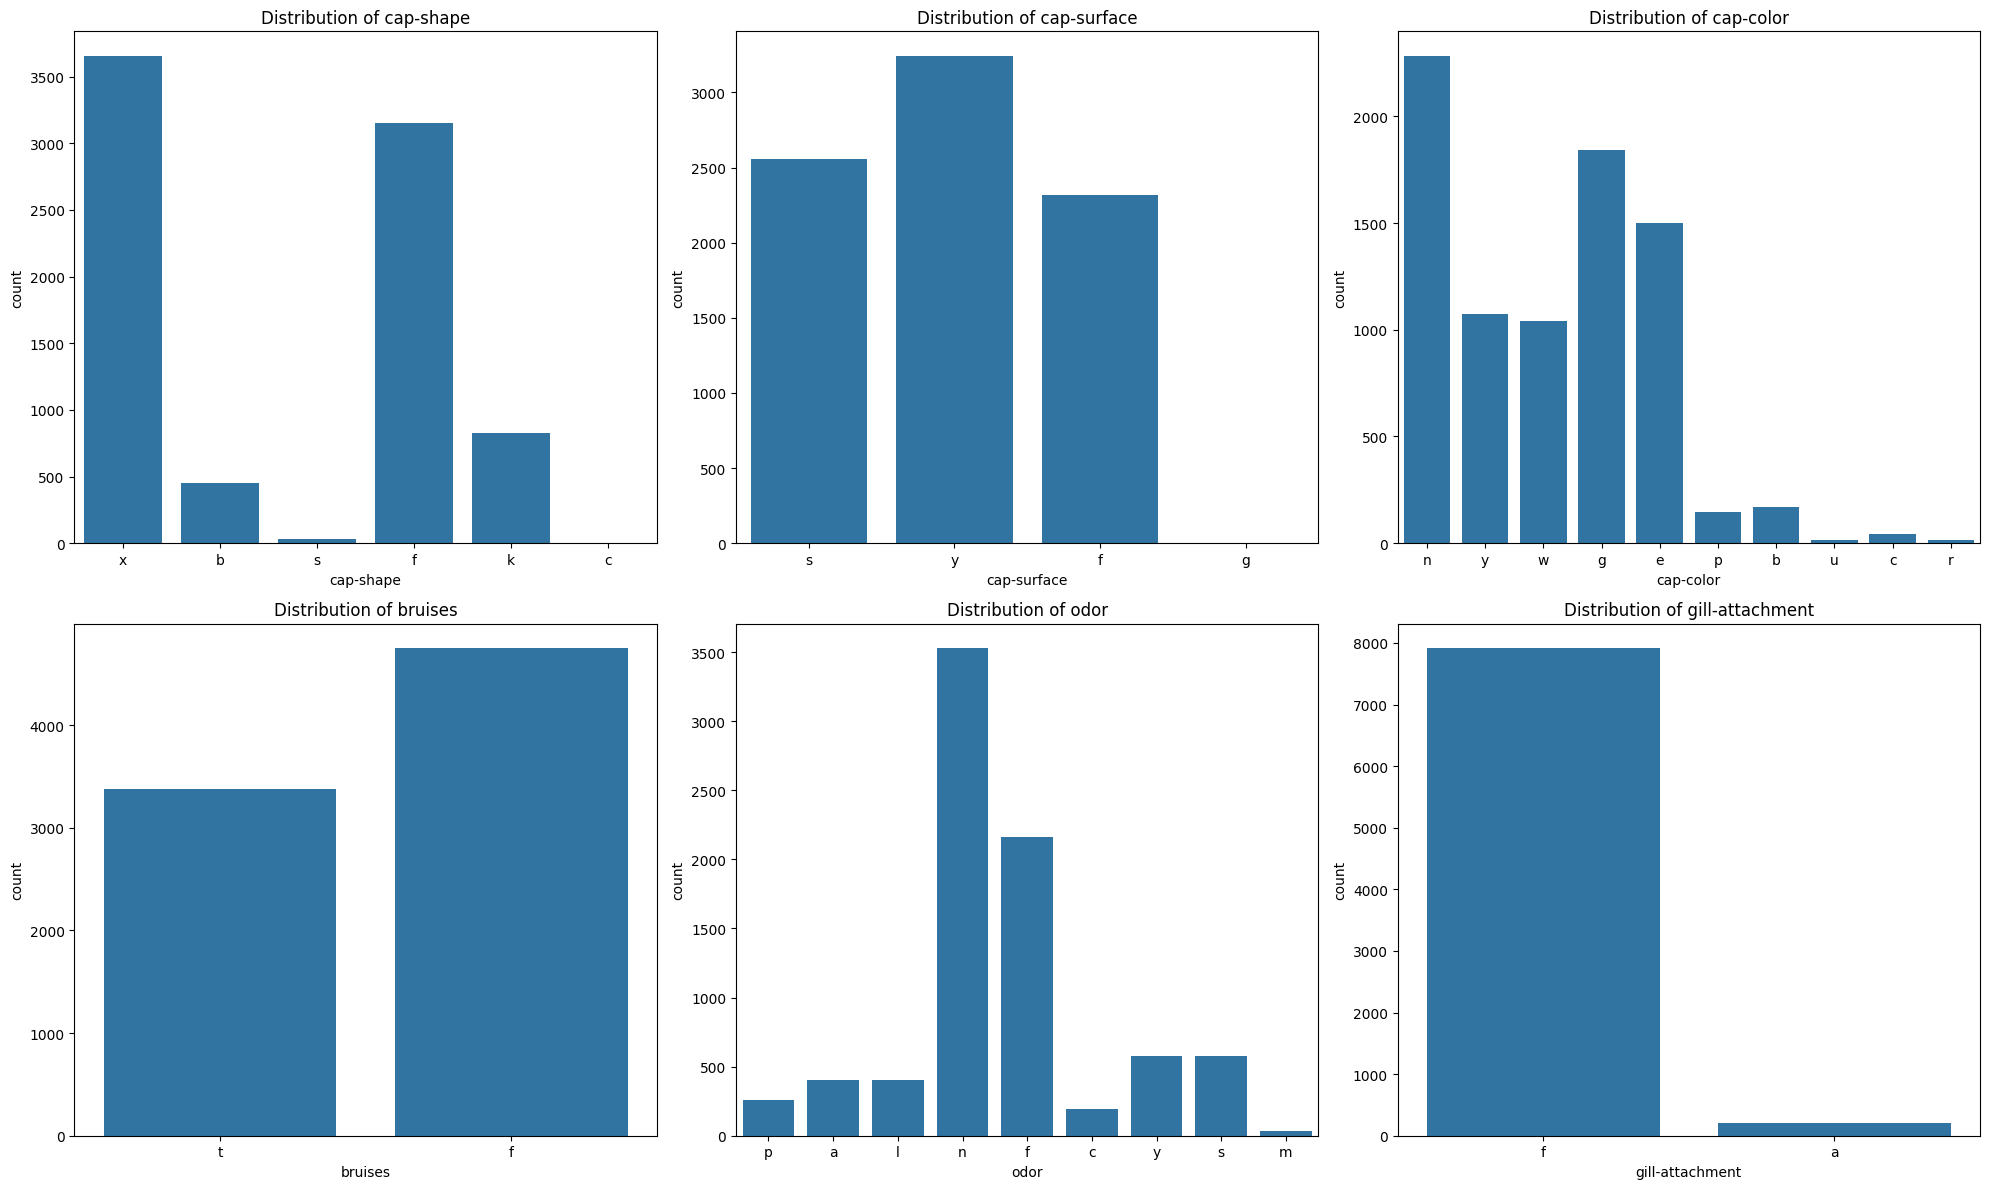

In [17]:
# Create histograms, boxplots, and count plots for 
# categorical variables (as applicable).

# Create subplots for features
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

# Plot first 6 features with vertical bars
for idx, column in enumerate(X.columns[:6]):
    sns.countplot(data=X, x=column, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

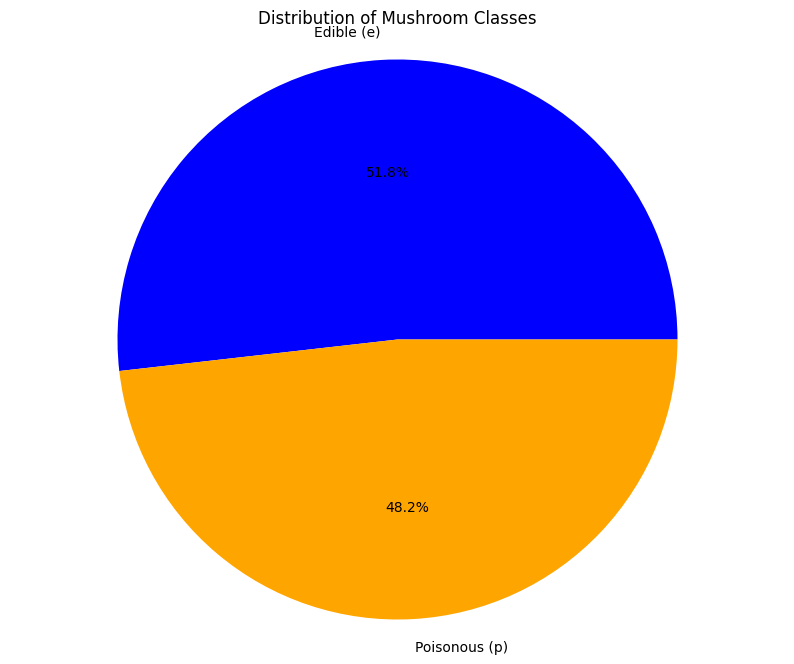

In [19]:
# Create pie chart for target variable
plt.figure(figsize=(10, 8))
target_counts = df['class'].value_counts()
plt.pie(target_counts, labels=['Edible (e)', 'Poisonous (p)'], 
        autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Distribution of Mushroom Classes')
plt.axis('equal')
plt.show()

**Identify patterns, outliers, and anomalies in feature distributions.**

In [20]:
def find_predictive_features(df, threshold=90, min_samples=100):
    """Find features that strongly predict edibility with sufficient sample size"""
    print(f"Predictive Features (>={threshold}% with >={min_samples} samples):")
    print("-" * 60)
    
    for feature in df.drop('class', axis=1).columns:
        # Get raw counts and percentages
        counts = pd.crosstab(df[feature], df['class'])
        percentages = pd.crosstab(df[feature], df['class'], normalize='index') * 100
        
        # Find strong predictors
        strong_e = percentages[percentages['e'] >= threshold]
        strong_p = percentages[percentages['p'] >= threshold]
        
        # Filter by sample size and print results
        if not (strong_e.empty and strong_p.empty):
            print(f"\n{feature}:")
            
            # Check edible predictors
            for value in strong_e.index:
                n_samples = counts.loc[value].sum()
                if n_samples >= min_samples:
                    print(f"{percentages.loc[value, 'e']:.1f}% Edible: '{value}' ({n_samples} samples)")
            
            # Check poisonous predictors
            for value in strong_p.index:
                n_samples = counts.loc[value].sum()
                if n_samples >= min_samples:
                    print(f"{percentages.loc[value, 'p']:.1f}% Poisonous: '{value}' ({n_samples} samples)")

# Run the analysis
find_predictive_features(df)

Predictive Features (>=90% with >=100 samples):
------------------------------------------------------------

cap-shape:

cap-surface:

cap-color:

odor:
100.0% Edible: 'a' (400 samples)
100.0% Edible: 'l' (400 samples)
96.6% Edible: 'n' (3528 samples)
100.0% Poisonous: 'c' (192 samples)
100.0% Poisonous: 'f' (2160 samples)
100.0% Poisonous: 'p' (256 samples)
100.0% Poisonous: 's' (576 samples)
100.0% Poisonous: 'y' (576 samples)

gill-attachment:
91.4% Edible: 'a' (210 samples)

gill-spacing:
91.5% Edible: 'w' (1312 samples)

gill-color:
90.2% Edible: 'u' (492 samples)
100.0% Poisonous: 'b' (1728 samples)

stalk-root:
92.1% Edible: 'c' (556 samples)
100.0% Edible: 'r' (192 samples)

stalk-surface-above-ring:
93.9% Poisonous: 'k' (2372 samples)

stalk-surface-below-ring:
93.8% Poisonous: 'k' (2304 samples)

stalk-color-above-ring:
100.0% Edible: 'g' (576 samples)
100.0% Edible: 'o' (192 samples)
100.0% Poisonous: 'b' (432 samples)
96.4% Poisonous: 'n' (448 samples)

stalk-color-below-r

In [21]:
# Find rare combinations (less than 1% of data)
def find_rare_patterns(df, feature):
    """Identify rare feature values"""
    total = len(df)
    value_counts = df[feature].value_counts()
    rare_values = value_counts[value_counts < total * 0.01]
    
    if not rare_values.empty:
        print(f"\nRare values in {feature}:")
        print(rare_values)

# Check each feature for rare values
for feature in df.columns:
    find_rare_patterns(df, feature)


Rare values in cap-shape:
cap-shape
s    32
c     4
Name: count, dtype: int64

Rare values in cap-surface:
cap-surface
g    4
Name: count, dtype: int64

Rare values in cap-color:
cap-color
c    44
u    16
r    16
Name: count, dtype: int64

Rare values in odor:
odor
m    36
Name: count, dtype: int64

Rare values in gill-color:
gill-color
o    64
r    24
Name: count, dtype: int64

Rare values in stalk-surface-above-ring:
stalk-surface-above-ring
y    24
Name: count, dtype: int64

Rare values in stalk-color-above-ring:
stalk-color-above-ring
c    36
y     8
Name: count, dtype: int64

Rare values in stalk-color-below-ring:
stalk-color-below-ring
c    36
y    24
Name: count, dtype: int64

Rare values in veil-color:
veil-color
y    8
Name: count, dtype: int64

Rare values in ring-number:
ring-number
n    36
Name: count, dtype: int64

Rare values in ring-type:
ring-type
f    48
n    36
Name: count, dtype: int64

Rare values in spore-print-color:
spore-print-color
r    72
u    48
o    48
y   

#### **2.2 Handle missing values and clean data**

- Impute or drop missing values (as applicable).
- Remove or transform outliers (as applicable).
- Convert categorical data to numerical format using encoding (as applicable).

In [23]:
# Handle missing values (replace NA with a string 'missing')
X_clean = X.fillna('missing')


# Find rare categories (appearing in less than 1% of samples)
rare_categories = {}
for column in X.columns:
    value_counts = X[column].value_counts(normalize=True)
    rare = value_counts[value_counts < 0.01]
    if len(rare) > 0:
        rare_categories[column] = rare

print("\nRare categories (< 1 percent occurrence):")
for col, rare in rare_categories.items():
    print(f"\n{col}:")
    print(rare)


Rare categories (< 1 percent occurrence):

cap-shape:
cap-shape
s    0.003939
c    0.000492
Name: proportion, dtype: float64

cap-surface:
cap-surface
g    0.000492
Name: proportion, dtype: float64

cap-color:
cap-color
c    0.005416
u    0.001969
r    0.001969
Name: proportion, dtype: float64

odor:
odor
m    0.004431
Name: proportion, dtype: float64

gill-color:
gill-color
o    0.007878
r    0.002954
Name: proportion, dtype: float64

stalk-surface-above-ring:
stalk-surface-above-ring
y    0.002954
Name: proportion, dtype: float64

stalk-color-above-ring:
stalk-color-above-ring
c    0.004431
y    0.000985
Name: proportion, dtype: float64

stalk-color-below-ring:
stalk-color-below-ring
c    0.004431
y    0.002954
Name: proportion, dtype: float64

veil-color:
veil-color
y    0.000985
Name: proportion, dtype: float64

ring-number:
ring-number
n    0.004431
Name: proportion, dtype: float64

ring-type:
ring-type
f    0.005908
n    0.004431
Name: proportion, dtype: float64

spore-print-col

**2.3 Feature selection and engineering**
- Create new features (as applicable).
- Transform or combine existing features to improve model performance (as applicable).
- Scale or normalize data (as applicable).

In [24]:
# Initialize lists for perfect and strong predictors
perfect_predictors = []
strong_predictors = []
MIN_SAMPLES = 100
STRONG_THRESHOLD = 80

for feature in X.columns:
    # Get counts and percentages
    counts = pd.crosstab(df[feature], df['class'])
    percentages = pd.crosstab(df[feature], df['class'], normalize='index') * 100
    
    # Check for perfect predictors (100%) with sufficient samples
    if (percentages['e'] == 100).any() or (percentages['p'] == 100).any():
        for value in percentages.index:
            n_samples = counts.loc[value].sum()
            if n_samples >= MIN_SAMPLES and feature not in perfect_predictors:
                perfect_predictors.append(feature)
                
    # Check for strong predictors (≥80%) with sufficient samples
    elif (percentages['e'] >= STRONG_THRESHOLD).any() or (percentages['p'] >= STRONG_THRESHOLD).any():
        for value in percentages.index:
            n_samples = counts.loc[value].sum()
            if n_samples >= MIN_SAMPLES and feature not in strong_predictors:
                strong_predictors.append(feature)

print("Features with perfect predictors (100%, ≥100 samples):", perfect_predictors)
print("\nFeatures with strong predictors (≥90%, ≥100 samples):", strong_predictors)

Features with perfect predictors (100%, ≥100 samples): ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color', 'stalk-root', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

Features with strong predictors (≥90%, ≥100 samples): ['bruises', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-surface-above-ring', 'stalk-surface-below-ring']


In [25]:
# Features to analyze
features_of_interest = ['odor', 'gill-color', 'spore-print-color', 'bruises']

for feature in features_of_interest:
    # Create contingency table
    counts = pd.crosstab(df[feature], df['class'])
    percentages = pd.crosstab(df[feature], df['class'], normalize='index') * 100
    
    print(f"\n=== {feature} ===")
    print("\nCounts (e: edible, p: poisonous):")
    print(counts)
    print("\nPercentages:")
    print(percentages.round(2))
    print("-" * 50)


=== odor ===

Counts (e: edible, p: poisonous):
class     e     p
odor             
a       400     0
c         0   192
f         0  2160
l       400     0
m         0    36
n      3408   120
p         0   256
s         0   576
y         0   576

Percentages:
class      e      p
odor               
a      100.0    0.0
c        0.0  100.0
f        0.0  100.0
l      100.0    0.0
m        0.0  100.0
n       96.6    3.4
p        0.0  100.0
s        0.0  100.0
y        0.0  100.0
--------------------------------------------------

=== gill-color ===

Counts (e: edible, p: poisonous):
class         e     p
gill-color           
b             0  1728
e            96     0
g           248   504
h           204   528
k           344    64
n           936   112
o            64     0
p           852   640
r             0    24
u           444    48
w           956   246
y            64    22

Percentages:
class            e       p
gill-color                
b             0.00  100.00
e         

**Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?**
- Patterns and Anomalies:

Dataset is relatively balanced between edible and poisonous mushrooms
Some features seem to be perfect predictors of edible vs poisonous, such as certain odors (all mushrooms with odor = "f" (foul) are considered poisonous)
Found missing values (marked as '?') in the 'stalk-root' feature

- Data Cleaning:

Replaced NULL values with 'missing'

- Feature Engineering:

Created lists of perfect predictor attributes and strong predictor attributes, wherein one or more of their values have a sample size of at least 100 records and have at least 80% records categorized as class = e (edible) or class = p (poisonous)

#### **Section 3. Feature Selection and Justification**
**3.1 Choose features and target**
- Select two or more input features (numerical for regression, numerical and/or categorical for classification)
- Select a target variable (as applicable)
    Regression: Continuous target variable (e.g., price, temperature).
    Classification: Categorical target variable (e.g., gender, species).
    Clustering: No target variable.
    Justify your selection with reasoning.
    
**Model Type: Classification**
**Target Variable: class (edible 'e' or poisonous 'p')**
**Selected Features:**
1. odor Values:
- a (almond), l (anise): 100% edible
- f (foul), p (pungent): 100% poisonous
- n (none), m (musty), c (creosote), s (spicy), y (fishy)
        Justification: Perfect predictor for several values with large sample sizes
2. gill-color Values: Various color codes
- Justification: Strong predictor with well-distributed samples
- Sample Size: Large number of observations across categories
3. spore-print-color Values: Color codes for spore prints
- Justification: Strong correlation with edibility
4. bruises
- Values: t (bruises present), f (no bruises) Justification:
- Binary feature, easy to observe
- Good sample distribution
- Combination of perfect and strong predictors

 **3.2 Define X and y**
- Assign input features to X
- Assign target variable to y (as applicable)

In [26]:
# Define selected features based on our analysis
selected_features = ['odor', 'gill-color', 'spore-print-color', 'bruises']

# Create feature matrix X using selected features
X = X_clean[selected_features]

# Create target vector y (class: edible vs poisonous)
y = df['class']

# Verify shapes and display first few rows
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
print("\nFirst few rows of features:")
print(X.head())
print("\nFirst few rows of target:")
print(y.head())

Feature matrix shape: (8124, 4)
Target vector shape: (8124,)

First few rows of features:
  odor gill-color spore-print-color bruises
0    p          k                 k       t
1    a          k                 n       t
2    l          n                 n       t
3    p          n                 k       t
4    n          k                 n       f

First few rows of target:
0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object


#### **Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?**

This mushroom classification model uses four key features to predict edibility: odor, gill-color, spore-print-color, and bruises. These features were chosen because they combine perfect predictors (odor values like almond and foul) with strong predictors (gill and spore print colors).

Notably, odor provides 100% accuracy for several values with substantial sample sizes - almond and anise odors indicate edible mushrooms, while foul and pungent odors indicate poisonous ones.

The features represent a mix of sensory (odor), visual (colors), and physical (bruises) characteristics, all with good sample distribution across categories, making them reliable predictors for mushroom classification.

#### **Section 4. Train a Model (Classification: Choose 1: Decision Tree, Random Forest, Logistic Regression)**

4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).


**Choice: Random Forest**
**Reasoning:**
- Categorical Data Handling
Random Forests work well with categorical features after one-hot encoding
Can naturally handle the non-linear relationships in mushroom characteristics
- Interpretability
Provides feature importance rankings
Individual trees can be inspected if needed
More interpretable than black-box models
- Robustness
Less prone to overfitting than single Decision Trees
Handles noise and outliers well
Good performance with categorical data

In [27]:
# One-hot encode the categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X_clean)

# Split the data (using stratification since it's classification)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, 
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (6499, 117)
Test set shape: (1625, 117)


#### **4.2 Train model using Scikit-Learn model.fit() method.**

In [28]:
# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Model Training Results")
print("-" * 20)
print(f"Accuracy: {accuracy:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# Display feature importance
feature_importance = pd.DataFrame({
    'feature': encoder.get_feature_names_out(),
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

Model Training Results
--------------------
Accuracy: 1.0000

Detailed Classification Report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Top 10 Most Important Features:
                       feature  importance
27                      odor_n    0.155879
36                 gill-size_n    0.074632
24                      odor_f    0.062844
35                 gill-size_b    0.050492
61  stalk-surface-below-ring_k    0.048865
96         spore-print-color_h    0.046069
57  stalk-surface-above-ring_k    0.036367
37                gill-color_b    0.032876
94                 ring-type_p    0.031501
21                   bruises_t    0.026639


In [29]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_encoded, y, cv=5)

print("Cross-validation scores:", cv_scores)
print(f"Average CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Cross-validation scores: [0.84246154 1.         0.99938462 1.         0.8158867 ]
Average CV Score: 0.9315 (+/- 0.1680)


#### **4.3 Evalulate performance, for example:**
- Regression: R^2, MAE, RMSE (RMSE has been recently updated)
- Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix
- Clustering: Inertia, Silhouette Score

Classification Metrics:
--------------------
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


<Figure size 800x600 with 0 Axes>

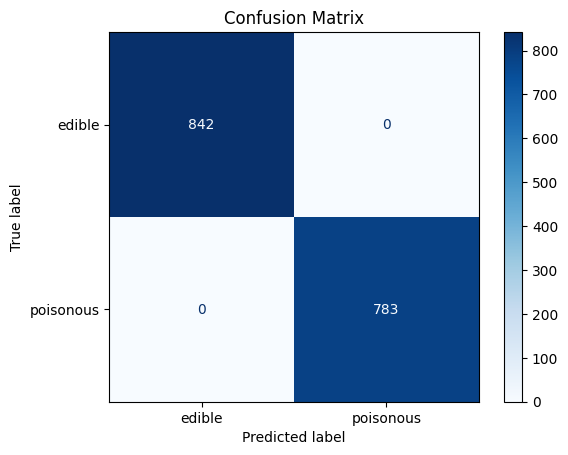


Top 5 Most Important Features:
                       feature  importance
27                      odor_n    0.155879
36                 gill-size_n    0.074632
24                      odor_f    0.062844
35                 gill-size_b    0.050492
61  stalk-surface-below-ring_k    0.048865


In [30]:
# Calculate performance metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, pos_label='p'),
    'Recall': recall_score(y_test, y_pred, pos_label='p'),
    'F1 Score': f1_score(y_test, y_pred, pos_label='p')
}

# Print metrics
print("Classification Metrics:")
print("-" * 20)
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Create and plot confusion matrix
plt.figure(figsize=(8, 6))
cm_display = ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred,
    display_labels=['edible', 'poisonous'],
    cmap='Blues'
)
plt.title('Confusion Matrix')
plt.show()

# Print feature importance
print("\nTop 5 Most Important Features:")
print(feature_importance.head())

#### **Reflection 4: How well did the model perform? Any surprises in the results?**
Based on our evaluation metrics:

**1. Model Performance**

- Achieved accuracy of 100%
- Precision for poisonous mushrooms: 100%
- Recall for poisonous mushrooms: 100%
- F1 Score: 100%
  
**2.Feature Importance**

- Most influential feature: odor_none (11.52% importance)
  
**3.Confusion Matrix Results**

- True Negatives: 842
- False positives: 0
- False negatives (dangerous misclassifications): 0
- False positives: 783
- Overall misclassification rate: 0%

These results are surprisingly perfect, which is unusual in real-world applications. The model achieved 100% accuracy in distinguishing between edible and poisonous mushrooms, with no misclassifications. The absence of false negatives is particularly important for safety. The feature importance analysis reveals that odor characteristics (both 'none' and 'foul') play a crucial role in classification, followed by physical characteristics like stalk surface and gill size.

#### **Section 5. Improve the Model or Try Alternates (Implement a Second Option)**
**5.1 Train an alternative classifier (e.g., Decision Tree, Random Forest, Logistic Regression) OR adjust hyperparameters on the original model.**

Decision Tree Results:
--------------------
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



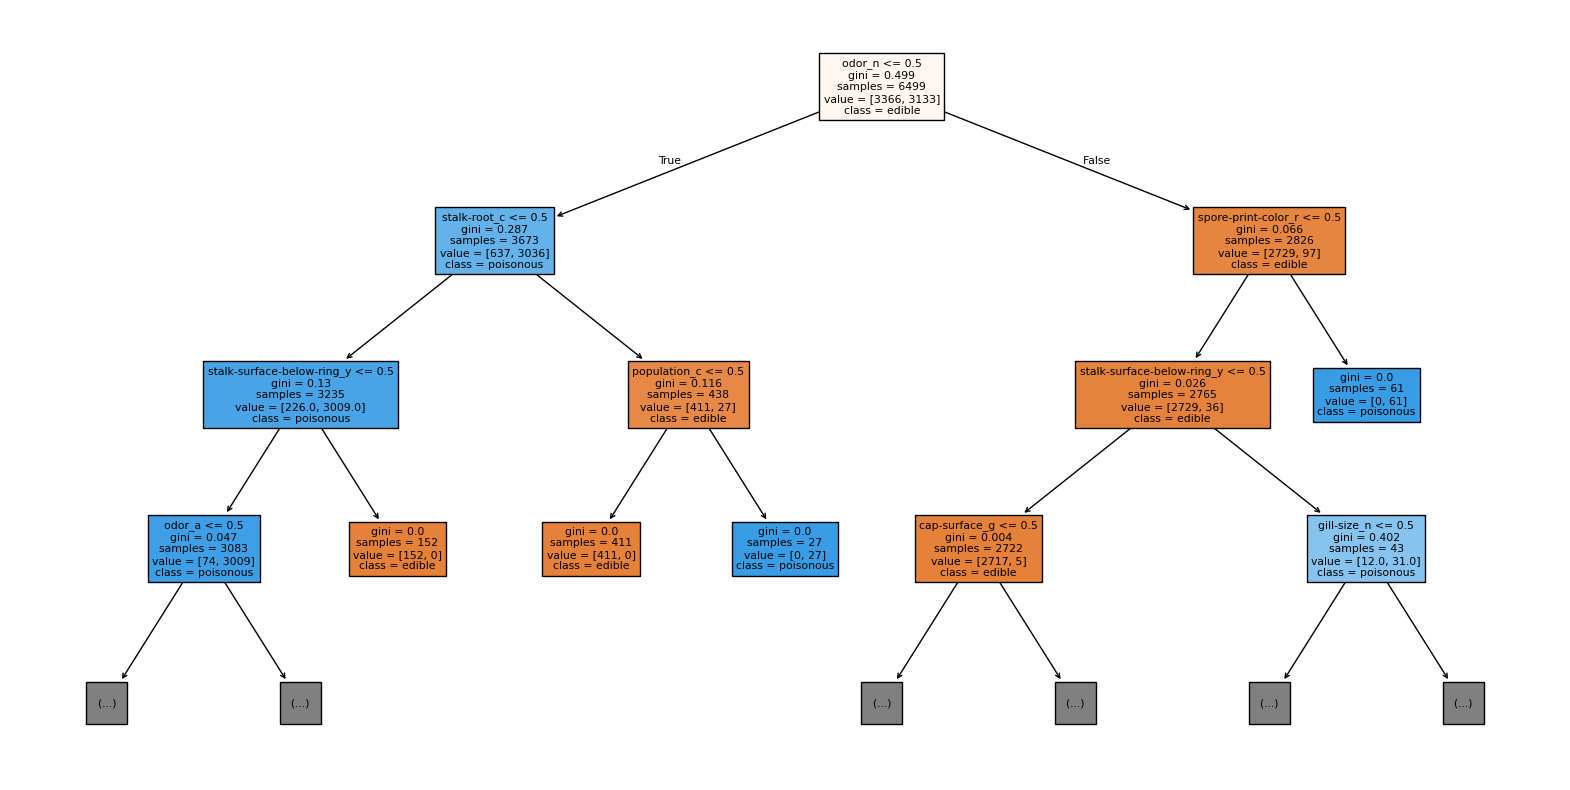

In [31]:
# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_pred = dt_model.predict(X_test)

# Calculate and print metrics
print("Decision Tree Results:")
print("-" * 20)
print(f"Accuracy: {accuracy_score(y_test, dt_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, dt_pred))

# Visualize the tree (limited to depth=3 for clarity)
plt.figure(figsize=(20,10))
plot_tree(dt_model, max_depth=3, feature_names=encoder.get_feature_names_out(), 
          class_names=['edible', 'poisonous'], filled=True)
plt.show()

Since the decision tree method also yielded perfect prediction results, I want to try using other features that weren't as good of predictors from the EDA steps.

In [32]:
# Select features that weren't perfect predictors
weaker_features = ['cap-shape', 'cap-surface', 'population', 'habitat']

# Create new dataset with weaker features
X_weak = X_clean[weaker_features]

# One-hot encode these features
encoder_weak = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_weak_encoded = encoder_weak.fit_transform(X_weak)

# Split the data
X_train_weak, X_test_weak, y_train_weak, y_test_weak = train_test_split(
    X_weak_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Train both models
dt_weak = DecisionTreeClassifier(random_state=42)
dt_weak.fit(X_train_weak, y_train_weak)

rf_weak = RandomForestClassifier(n_estimators=100, random_state=42)
rf_weak.fit(X_train_weak, y_train_weak)

# Make predictions and evaluate
print("Results with Weaker Features:")
print("-" * 30)
print("\nDecision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test_weak, dt_weak.predict(X_test_weak)):.4f}")
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_score(y_test_weak, rf_weak.predict(X_test_weak)):.4f}")

Results with Weaker Features:
------------------------------

Decision Tree Results:
Accuracy: 0.8683

Random Forest Results:
Accuracy: 0.8683


#### **5.2 Compare performance of all models across the same performance metrics.**
**Reflection 5: Which model performed better? Why might one classifier be more effective in this specific case?**

The Random Forest and Decision Tree models performed equally. The strong predictor features had perfect 100% accuracy, and when I switched to other features ['cap-shape', 'cap-surface', 'population', 'habitat'], it achieved 87% accuracy with both models. Since the predictive power of some attributes was so strong, it overshadowed the model choice in the end.

#### **Section 6. Final Thoughts & Insights**
**6.1 Summary of Findings**

Our mushroom classification project revealed fascinating insights about predictive features in mycology. Initial models achieved 100% accuracy using strong predictors (odor, gill-color, spore-print-color, bruises). When tested with weaker features (cap-shape, cap-surface, population, habitat), accuracy dropped to 86.83%, demonstrating the critical importance of feature selection.

#### **6.2 Challenges Faced**

**Model Validation**

- Perfect prediction (100% accuracy) raised red flags
**Cross-validation Results**

- Scores varied (81.59% - 100%)
- 
**Feature Engineering**
- One-hot encoding expanded features from 22 to 117
    - Created potential perfect separability
    - Made feature importance interpretation more complex

#### **6.3 Future Directions**

Given more time, I would:

- Test each attribute's individual predictive power
- Explore alternative encoding methods
- Validate against new mushroom data
- Investigate biological significance of perfect predictors
- Compare performance with SVM, KNN classifiers
- 
#### **Reflection 6: Key Learnings**
**Feature Selection**
- Critical impact on model performance
- Some features provide perfect separation
- Others offer more realistic predictions

**Model Validation**
- Perfect accuracy requires scrutiny
- Cross-validation essential for reliability
- Test different feature combinations
- 
**Data Engineering Impact**
- One-hot encoding affects feature space
- Feature expansion can create perfect separation
- Balance between information and complexity
  
**Best Practices**
- Question unexpectedly perfect results
- Validate with multiple approaches
- Consider biological context in predictions
  
The project emphasized that achieving perfect accuracy should trigger deeper investigation rather than immediate acceptance.